# Group Project - Cat Image Classification

## Group 4: Isaiah Martinez, Joycelyn Tuazon
## Mrs. Lord - Comp 542 Machine Learning

# Guides that may provide insight

In [9]:
#Count objects
#https://new.pythonforengineers.com/blog/image-and-video-processing-in-python/

#Basic outline for image classificaiton. See youtube video too.
#https://www.youtube.com/watch?v=il8dMDlXrIE
#https://github.com/computervisioneng/image-classification-python-scikit-learn/blob/master/main.py

#Image classification with Tensorflow and Keras
#https://www.tensorflow.org/tutorials/images/classification

#Load and Preprocess Images
#https://www.tensorflow.org/tutorials/load_data/images

## Kaggle Examples with Code to look at

In [10]:
# Good to model after
# Also in the Conv2D section
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda

# plots vertical/horizontal edge detection
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification
# Consider KNN

## CNN Examples

In [11]:
# https://www.kaggle.com/code/dongduongminh/cnn-deep-learning-image-classification
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/corneliustantius/classification-with-keras-cnn
# SEE `explaining-line.ipynb`

## ConNeXt

In [12]:
# https://www.kaggle.com/code/chenjiarui2018/cats-dogs-and-pandas-convnext#3.-Model

## VGG16 CNN

In [13]:
# https://www.kaggle.com/code/arpita12/cat-dog-panda
# https://www.kaggle.com/code/rwt1998/animal-classification
# https://www.kaggle.com/code/atmaraiprince/animal-image-dataset
# https://www.kaggle.com/code/kkamal2003/animal-images-cnn

## Conv 2D

In [14]:
# https://www.kaggle.com/code/shaileshkakade/image-classification-cat-dog-panda
# https://www.kaggle.com/code/etienne1976/animal-image-classification-with-keras
# https://www.kaggle.com/code/bygbrains/dog-cat-pandas-image-classifier
# https://www.kaggle.com/code/dianalaveena/cnn-keras-image-classification#5.-Model-Building-and-Compilation

## Res Net 50

In [15]:
# https://www.kaggle.com/code/nasrinjahanripa/animal-images-classification-cnn
# https://www.kaggle.com/code/profmedo/image-classification-cnn-with-resnet
# https://www.kaggle.com/code/kkamal2003/resnet-for-classification
# https://www.kaggle.com/code/arshnoor7389/resnet-for-classification

## OpenAI - CLIP
## Dont use CLIP as project. CLIP may provide insight or be compared to, but not submitted for grade

In [16]:
# GITHUB LINK:
# https://github.com/openai/CLIP/blob/main/model-card.md#model-card-clip
# https://www.kaggle.com/code/kimchanyoung/zero-shot-prediction-using-openai-s-clip

# Individual Work:

In [1]:
#Resize all images into arrays
import projHelper as pjH

cats_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/cats/")
dogs_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/dogs/")
panda_resized = pjH.getResizedGrayscaleFlattenedArrays("animals_cleaned/panda/")

#each image is an array of 750,000 (500 * 500 * 3)
print(cats_resized[0])
print(cats_resized[0].shape)

#Resized cat/dog/panda images into a single array of size 994/990/968
print("# cat imgs", len(cats_resized))
print("# dog imgs", len(dogs_resized))
print("# panda imgs", len(panda_resized))
print("total dataset size is", len(cats_resized) + len(dogs_resized) + len(panda_resized))

#15 second runtime

[187. 194. 169. ... 188. 187. 186.]
(250000,)
# cat imgs 994
# dog imgs 990
# panda imgs 968
total dataset size is 2952


In [2]:
#Save the modified images into animals_cleaned_GS directory
import projHelper as pjH

pjH.saveModifiedImages("animals_cleaned/cats/", "animals_cleaned_GS/cats/")

In [4]:
#create labels and combine data into a single array

#insert labels into array
labels = ["cat"] * len(cats_resized) + ["dog"] * len(dogs_resized) + ["panda"] * len(panda_resized)

#combine data into a single array
data_resized = [*cats_resized, *dogs_resized, *panda_resized]

#compare sizes of labels and data_resized since they should be the same
#expected: True
print(len(data_resized) == len(labels))

#testing labels
#expected: cat cat dog dog panda panda
print(labels[0], labels[993], labels[994], labels[1983], labels[1984], labels[2951])

True
cat cat dog dog panda panda


In [5]:
#split the data into train and test
from sklearn.model_selection import train_test_split

#80/20 split
xTrain, xTest, yTrain, yTest = train_test_split(data_resized, labels, test_size = 0.2)

print(len(xTrain), xTrain, "\n")
print(len(yTrain), yTrain, "\n")
print(len(xTest), xTest, "\n")
print(len(yTest), yTest, "\n")

#each array in xTrain and xTest is of type: float32
#the max value from xTrain and xTest is 255

2361 [array([ 28.,  29.,  29., ..., 169., 167., 163.], dtype=float32), array([163., 144., 126., ...,   0.,   0.,   0.], dtype=float32), array([140.,  90.,  74., ..., 184., 142., 176.], dtype=float32), array([173., 135., 120., ..., 199., 208., 215.], dtype=float32), array([27., 27., 27., ...,  6.,  6.,  6.], dtype=float32), array([ 0.,  1.,  1., ..., 72., 60., 52.], dtype=float32), array([201., 201., 202., ..., 192., 132.,  90.], dtype=float32), array([109., 109., 109., ..., 253., 253., 253.], dtype=float32), array([237., 237., 237., ..., 179., 180., 181.], dtype=float32), array([171., 171., 170., ..., 182., 181., 181.], dtype=float32), array([72., 69., 70., ..., 51., 51., 57.], dtype=float32), array([198., 198., 198., ..., 136., 142., 146.], dtype=float32), array([71., 76., 77., ..., 17., 17., 17.], dtype=float32), array([71., 79., 88., ..., 54., 53., 52.], dtype=float32), array([40., 35., 40., ..., 52., 56., 57.], dtype=float32), array([37., 40., 35., ..., 65., 67., 68.], dtype=float3

In [22]:
#########################################################
#                       Notes                           #
#########################################################

# print out Accuracy, Specificity, Recall, F1 Score. If possible, also the Confusion Matrix

# Analyze model for Over/Underfitting so that it can be reduced

# Use/find an alg to balance the class vs not class for images (Cat vs Non-Cat)

# possibly convert rgb images to grayscale using GLCM
#      might want to compare rgb images and grayscale

In [23]:
# #Confusion Matrix
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# cm = confusion_matrix([Y TEST DATA], [Y PREDICTIONS FROM MODEL], labels = [MODEL].classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [MODEL].classes_)
# disp.plot()
# plt.show()

#This is the code that I ran to obtain the Confusion Matrix for SVM

## Isaiah Martinez

## SVM Classifier

### Testing the svm classifier with no parameter changes

In [28]:
#feed dataset into model

from sklearn import svm

clf = svm.SVC(kernel = 'linear', cache_size = 2000, max_iter = 5000, decision_function_shape = 'ovo', verbose = True)
clf.fit(xTrain, yTrain)

#15 minute runtime

[LibSVM]

c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(cache_size=2000, decision_function_shape='ovo', kernel='linear',
    max_iter=5000, verbose=True)

In [29]:
#predict and obtain metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = clf.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)

#4 minute runtime

#metrics:
#0.5617597292724196 0.570465072568459 0.591411754950014 0.5617597292724196

0.5617597292724196 0.570465072568459 0.591411754950014 0.5617597292724196


### Pipeline + GridSearch

In [8]:
###     Final Pipeline
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', svm.SVC(cache_size = 16000, max_iter = 10000, decision_function_shape = 'ovr', verbose = True))
])

params = {
    'classifier__kernel' : ['poly', 'rbf'],
    'classifier__C' : [100, 10, 1],
    'classifier__gamma' : [100, 10, 1],
    'classifier__degree' : [3]
}

# [100, 10, 1, 0.1, 0.01]

gridSearch = GridSearchCV(pipeline, params, cv = 5, n_jobs = -1, verbose = 4)

gridSearch.fit(xTrain, yTrain)

#1750 minute runtime (initial)
#x minute runtime

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
245 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Python310\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Python310\lib\site-packages\joblib\memory.py", line 349, in __call

[LibSVM]

c:\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        SVC(cache_size=2000, kernel='poly',
                                            max_iter=10000, verbose=True))]),
             n_jobs=-1,
             param_grid={'classifier__C': [100, 10, 1, 0.1, 0.01],
                         'classifier__gamma': [100, 10, 1, 0.1, 0.01],
                         'scaler': [MinMaxScaler(), StandardScaler()]},
             verbose=4)

In [9]:
#print the best params and best model found from Grid Search
gridSearchParams = gridSearch.best_params_
gridSearchModel = gridSearch.best_estimator_

print(gridSearchParams, gridSearchModel)

{'classifier__C': 100, 'classifier__gamma': 100, 'scaler': MinMaxScaler()} Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=100, cache_size=2000, gamma=100, kernel='poly',
                     max_iter=10000, verbose=True))])


In [10]:
#prediction and metrics

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

yPred = gridSearchModel.predict(xTest)

acc = accuracy_score(yTest, yPred)
f1 = f1_score(yTest, yPred, average = 'weighted')
prec = precision_score(yTest, yPred, average = 'weighted')
recall = recall_score(yTest, yPred, average = 'weighted')

print(acc, f1, prec, recall)
#4 minute runtime

#initial run stats:
#0.5854483925549916 0.5885099209700294 0.5983072203381199 0.5854483925549916

NameError: name 'accuracy_score' is not defined

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(yTest, yPred, labels = gridSearchModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gridSearchModel.classes_)
disp.plot()
plt.show()

## Joycelyn Tuazon

## CNN

### Building CNN model from scratch

In [6]:
# CNN

import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [7]:
#train size 2361, test size 591

# reshape 500*500*1 matrices into vectors
xTrain_reshaped = np.reshape(xTrain, (2361, 250000))
xTest_reshaped = np.reshape(xTest, (591, 250000))

# normalize the images to be within [0-1] instead of [0-255]
xTrain_reshaped = pjH.scalePixels(xTrain_reshaped)
xTest_reshaped = pjH.scalePixels(xTest_reshaped)

# convert string labels to integer labels
label_encoder = LabelEncoder()
yTrain_encoded = label_encoder.fit_transform(yTrain)
yTest_encoded = label_encoder.transform(yTest)
# modify classes (cat, dog, panda) to be one-hot encoded vectors
classes = 3 # there are 3 classes (cat, dog, panda)
yTrain_one_hot = to_categorical(yTrain_encoded, classes)
yTest_one_hot = to_categorical(yTest_encoded, classes)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
# data augmentation

datagen = ImageDataGenerator (
    rotation_range=20, # rotate images randomly up to 20 degrees
    width_shift_range=0.2, # shift images horizontally up to 20% of the width
    height_shift_range=0.2, # shift images veritcally by up to 20% of the height
    shear_range=0.2, # apply shear transformations
    zoom_range=0.2, # zoom in or out by up to 20%
    horizontal_flip=True, # flip images horizontally
    fill_mode="nearest" # fill in missing pixels with the nearest available pixel
)

In [9]:
# build CNN model structure
model = Sequential()

# Layer 1 (Conv2D)
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(500, 500, 1)))

# Layer 2 (MaxPooling2D)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3 (Conv2D)
model.add(Conv2D(32, (3 ,3), activation="relu"))

# Layer 4 (MaxPooling2D)
model.add(MaxPooling2D(pool_size=(2,2)))

#Layer 5 (Conv2D)
model.add(Conv2D(64, (3, 3), activation="relu"))

# Layer 6 (MaxPooling2D)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Output Dense layer
model.add(Dense(3, activation="softmax"))

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 249, 249, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 123, 123, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 60, 60, 64)        0

In [10]:
from keras.optimizers.legacy import Adam
#from keras.optimizers.legacy  import SGD
# formula for adjusting learning rate as we increase batch size
default_learning_rate = 0.001
default_batch_size = 32
new_batch_size = 32 # adjust as desired

new_learning_rate = default_learning_rate * (new_batch_size / default_batch_size) ** -0.5

# compile the model
opt = Adam(learning_rate=new_learning_rate)
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [11]:
# reshape the data to the original (500, 500, 1) shape
xTrain_original_shape = xTrain_reshaped.reshape((xTrain_reshaped.shape[0], 500, 500, 1))
xTest_original_shape = xTest_reshaped.reshape((xTest_reshaped.shape[0], 500, 500, 1))

In [12]:
# create a generator for training data with data augmentation
train_generator = datagen.flow(xTrain_original_shape, yTrain_one_hot, batch_size=new_batch_size)

In [13]:
from keras.callbacks import EarlyStopping

# implement early stopping to prevent overfitting
# stop training if accuracy does not improve for 5 consecutive epochs
# restore the model's weights to the best configuration observed during training
early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

# fit the model on training data (with data augmentation)
history = model.fit(train_generator, epochs=25, verbose=1, validation_data=(xTest_original_shape, yTest_one_hot), callbacks=[early_stopping])

# fit the model on the training data (without data augmentation)
#model.fit(xTrain_original_shape, yTrain_one_hot, batch_size=new_batch_size, epochs=25, verbose=1, validation_data=(xTest_original_shape, yTest_one_hot), callbacks=[early_stopping])

# about 51 min 20 sec runtime (from run through all 25 epochs)

Epoch 1/25
74/74 [==============================] - 129s 2s/step - loss: 1.2938 - accuracy: 0.5036 - val_loss: 0.7385 - val_accuracy: 0.5821
Epoch 2/25
74/74 [==============================] - 125s 2s/step - loss: 0.8832 - accuracy: 0.5502 - val_loss: 0.7764 - val_accuracy: 0.6430
Epoch 3/25
74/74 [==============================] - 124s 2s/step - loss: 0.7981 - accuracy: 0.5925 - val_loss: 0.7421 - val_accuracy: 0.5905
Epoch 4/25
74/74 [==============================] - 125s 2s/step - loss: 0.7983 - accuracy: 0.5845 - val_loss: 0.7644 - val_accuracy: 0.6345
Epoch 5/25
74/74 [==============================] - 126s 2s/step - loss: 0.7761 - accuracy: 0.5989 - val_loss: 0.7797 - val_accuracy: 0.6091
Epoch 6/25
74/74 [==============================] - 127s 2s/step - loss: 0.7690 - accuracy: 0.5947 - val_loss: 0.6812 - val_accuracy: 0.6734
Epoch 7/25
74/74 [==============================] - 128s 2s/step - loss: 0.7770 - accuracy: 0.6057 - val_loss: 0.6769 - val_accuracy: 0.6684
Epoch 8/25
74

In [14]:
# evaluation
results = model.evaluate(xTest_original_shape, yTest_one_hot)

print("Test loss: ", results[0])
print("Test accuracy: ", results[1])

# first run about 0.7124 accuracy
# best run about 0.7648 accuracy with data augmentation, batch size 32

19/19 [==============================] - 6s 280ms/step - loss: 0.5618 - accuracy: 0.7648
Test loss:  0.5618492960929871
Test accuracy:  0.7648054361343384


In [15]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# prediction and metrics

# prediction
y_pred = model.predict(xTest_original_shape)

# convert one-hot encoded labels back to integers
y_true = yTest_one_hot.argmax(axis=1)
y_pred_classes = y_pred.argmax(axis=1)

# accuaracy, precision, recall, f1
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Test accuracy (calculated): {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

19/19 [==============================] - 6s 278ms/step
Test accuracy (calculated): 0.7648
Precision: 0.7614
Recall: 0.7648
F1 Score: 0.7528


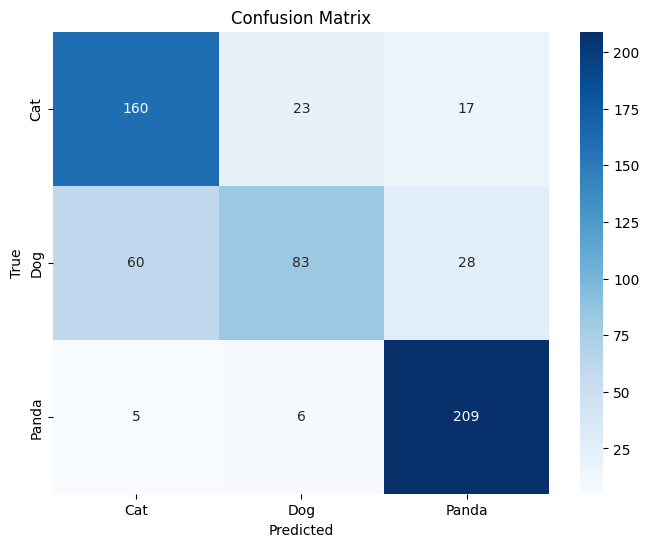

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# display confusion matrix using seaborn
class_names = ["Cat", "Dog", "Panda"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

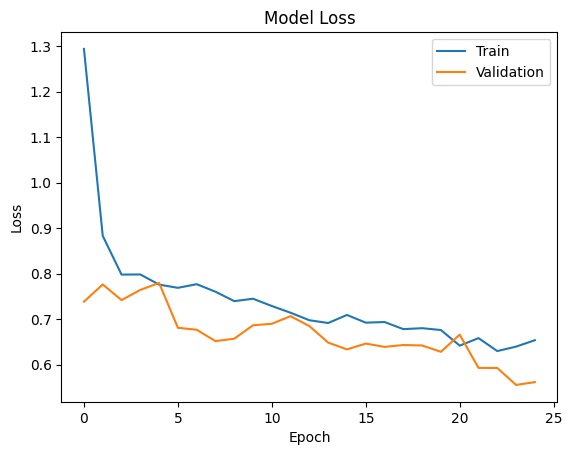

In [17]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

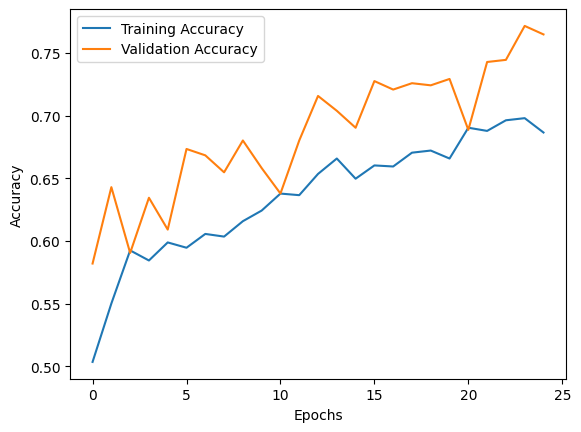

In [18]:
# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Finetuning pretrained VGG16 model

In [19]:
# VGG16
from keras.applications import VGG16
from keras.optimizers.legacy import SGD
from keras.optimizers.legacy import Adam
from keras.callbacks import EarlyStopping

In [20]:
import cv2

# resize and repeat to create pseudo-RGB images
xTrain_resized = [cv2.resize(img, (224, 224)) for img in xTrain]
xTrain_rgb = np.repeat(np.expand_dims(xTrain_resized, axis=-1), 3, axis=-1) # replicate the single channel to create pseudo RGB images

xTest_resized = [cv2.resize(img, (224, 224)) for img in xTest]
xTest_rgb = np.repeat(np.expand_dims(xTest_resized, axis=-1), 3, axis=-1)

# normalize the images to be within [0-1] instead of [0-255]
xTrain_rgb = xTrain_rgb / 255.0
xTest_rgb = xTest_rgb / 255.0


# convert string labels to integer labels
label_encoder = LabelEncoder()
yTrain_encoded = label_encoder.fit_transform(yTrain)
yTest_encoded = label_encoder.transform(yTest)
# modify classes (cat, dog, panda) to be one-hot encoded vectors
classes = 3 # there are 3 classes (cat, dog, panda)
yTrain_one_hot = to_categorical(yTrain_encoded, classes)
yTest_one_hot = to_categorical(yTest_encoded, classes)

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [54]:
# load VGG16 base model without top layers
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# load weights manually
weights_path = "/Users/joycelyn/Documents/School/Comp542/GroupProject/comp_542_proj/group_proj/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model.load_weights(weights_path)

# build model
model = Sequential()
model.add(base_model)

# add custom layers on top
model.add(Flatten())
model.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(3, activation='softmax'))  # 3 classes (cat, dog, panda)

In [56]:
# unfreeze base layers
for layer in base_model.layers:
    layer.trainable = False

In [57]:
# compile VGG16 model
from keras.callbacks import LearningRateScheduler

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [58]:
# reshape the data to match the expected input shape of the model
xTest_rgb_original= xTest_rgb.reshape((-1, 224, 224, 3))
xTrain_rgb_original = xTrain_rgb.reshape((-1, 224, 224, 3))

In [59]:
# Fit the generator on your original training data
datagen.fit(xTrain_rgb_original)

# Create a generator for training data
train_generator = datagen.flow(xTrain_rgb_original, yTrain_one_hot, batch_size=32)

In [60]:
# implement early stopping to prevent overfitting
# stop training if accuracy does not improve for 5 consecutive epochs
# restore the model's weights to the best configuration observed during training
early_stopping = EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

# fit the model on the training data (with data augmentation)
history = model.fit(train_generator, epochs=15, validation_data=(xTest_rgb_original, yTest_one_hot), callbacks=[early_stopping])

# fit the model on the training data (without data augmentation)
#model.fit(xTrain_rgb_original, yTrain_one_hot, epochs=25, verbose=1, batch_size=32, validation_data=(xTest_rgb_original, yTest_one_hot), callbacks=[early_stopping])

Epoch 1/15
74/74 [==============================] - 280s 4s/step - loss: 1.0952 - accuracy: 0.4011 - val_loss: 1.0542 - val_accuracy: 0.3672
Epoch 2/15
74/74 [==============================] - 274s 4s/step - loss: 1.0359 - accuracy: 0.4515 - val_loss: 0.9922 - val_accuracy: 0.5567
Epoch 3/15
74/74 [==============================] - 274s 4s/step - loss: 1.0051 - accuracy: 0.4917 - val_loss: 1.0000 - val_accuracy: 0.4822
Epoch 4/15
74/74 [==============================] - 274s 4s/step - loss: 0.9947 - accuracy: 0.4905 - val_loss: 0.9751 - val_accuracy: 0.5178
Epoch 5/15
74/74 [==============================] - 273s 4s/step - loss: 0.9964 - accuracy: 0.4812 - val_loss: 0.9713 - val_accuracy: 0.5059
Epoch 6/15
74/74 [==============================] - 273s 4s/step - loss: 0.9768 - accuracy: 0.4981 - val_loss: 0.9525 - val_accuracy: 0.5330
Epoch 7/15
74/74 [==============================] - 273s 4s/step - loss: 0.9770 - accuracy: 0.4956 - val_loss: 0.9404 - val_accuracy: 0.5448


In [61]:
# evaluation
results = model.evaluate(xTest_rgb_original, yTest_one_hot)

print("VGG16 test loss: ", results[0])
print("VGG16 test accuracy: ", results[1])

# best accuracy about 60%

19/19 [==============================] - 55s 3s/step - loss: 0.9922 - accuracy: 0.5567
VGG16 test loss:  0.9922425746917725
VGG16 test accuracy:  0.5566835999488831


In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# prediction and metrics

# prediction
y_pred = model.predict(xTest_rgb_original)

# convert one-hot encoded labels back to integers
y_true = yTest_one_hot.argmax(axis=1)
y_pred_classes = y_pred.argmax(axis=1)

# accuaracy, precision, recall, f1
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Accuracy (calculated): {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

19/19 [==============================] - 56s 3s/step
Accuracy (calculated): 0.5567
Precision: 0.5893
Recall: 0.5567
F1 Score: 0.4961


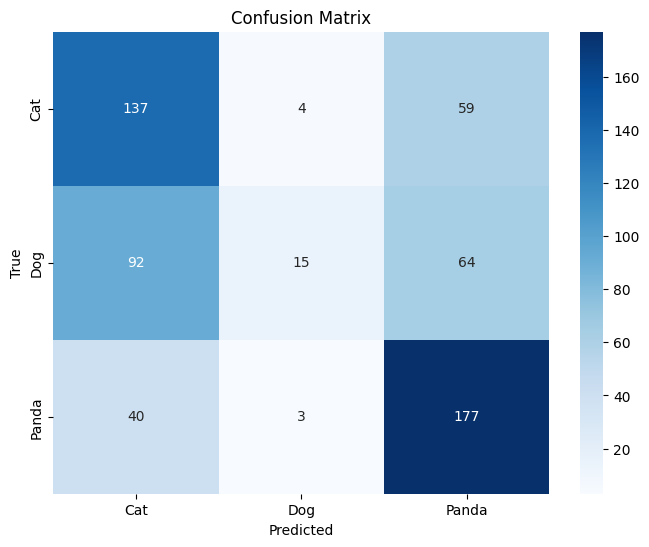

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# display confusion matrix using seaborn
class_names = ["Cat", "Dog", "Panda"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

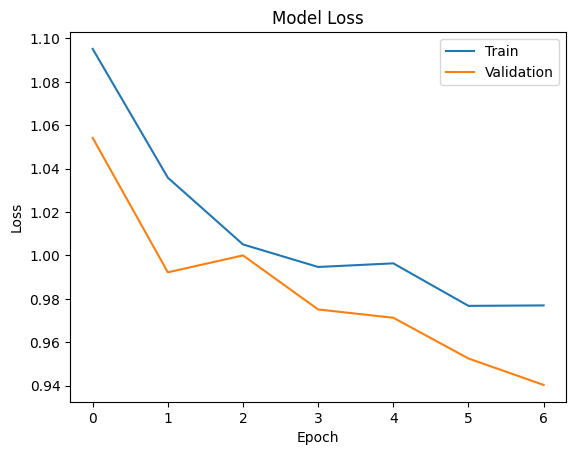

In [64]:
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

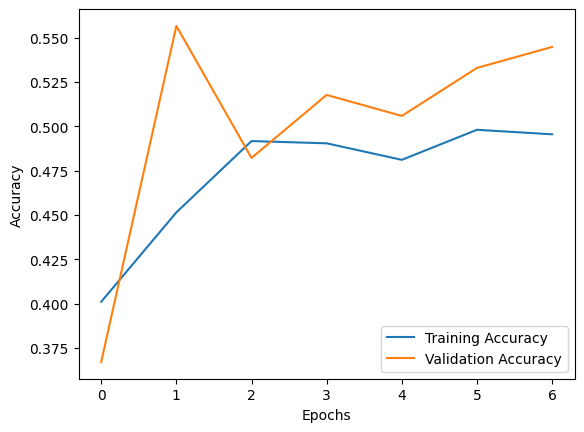

In [65]:
# plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()